Сравнение времени обычного и блочного транспонирования матрицы n=15000

transpose time: 1.99474 s.

block transpose time: 1.84714 s, block_size = 10

Попробуем найти оптимальные размеры блоков для блочного перемножения матриц n=1024

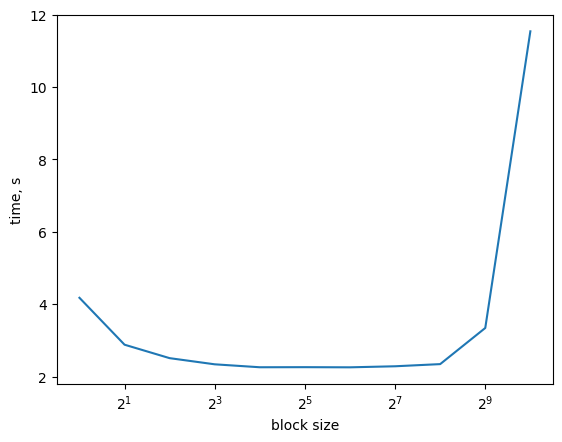

In [3]:
import matplotlib.pyplot as plt
bs = [1,       2,       4,       8,       16,     32,      64,      128,     256,     512,     1024]
bl = [4.17826, 2.88194, 2.50999, 2.33975, 2.2584, 2.26077, 2.25658, 2.28551, 2.34523, 3.34382, 11.542]

plt.plot(bs, bl)
plt.xlabel("block size")
plt.ylabel("time, s")
plt.xscale("log", base=2)

За оптимальный размер блока примем bs=64.

Теперь найдём оптимальный threshold для алгоритма Штрассена, при котором будем переходить на обычный $n^3$ алгоритм.

Сравнение реализованных алгоритмов: обычное умножение, транспонирование правого сомножителя, блочное перемножение, блочное перемножение с транспонированием, алгоритм Штрассена.

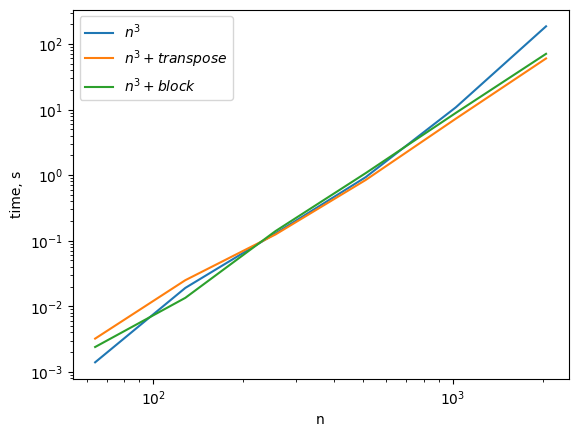

In [ ]:
N =     [64,            128,        256,        512,        1024,       2048]
n3 =    [0.00140146,    0.0190887,  0.129321,   0.931388,   10.8168,    185.596]
n3tr =  [0.00322068,    0.0250329,  0.124665,   0.843104,   7.25912,    60.0307]
n3bl =  [0.00239962,    0.0134735,  0.140308,   1.07285,    8.89357,    70.6776]

plt.plot(N, n3, label="$n^3$")
plt.plot(N, n3tr, label="$n^3 + transpose$")
plt.plot(N, n3bl, label="$n^3 + block$")
plt.xlabel("n")
plt.ylabel("time, s")
plt.xscale("log")
plt.yscale("log")
plt.legend()

Аналогичные измерения но с использованием mpi parallel for для 8 потоков

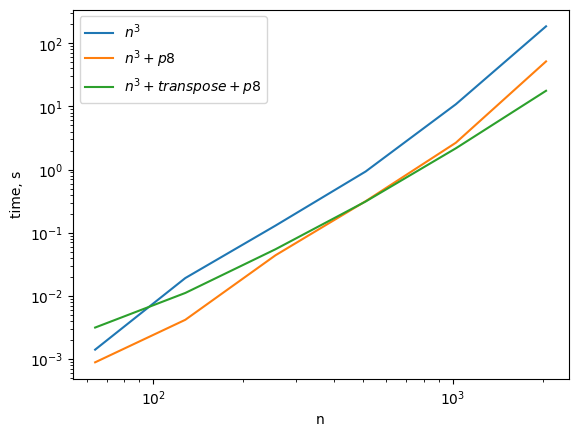

In [21]:
N =     [64,            128,        256,        512,        1024,       2048]
n3p8 =  [0.000882808,   0.00416501, 0.0438107,  0.315187,   2.65829,    51.6099]
n3tr =  [0.0031376,     0.0110873,  0.0545902,  0.311741,   2.16919,    17.6774]

plt.plot(N, n3, label="$n^3$")
plt.plot(N, n3p8, label="$n^3 + p8$")
plt.plot(N, n3tr, label="$n^3 + transpose + p8$")
# plt.plot(N, n3bl, "--", label="$n^3 + block$")
plt.xlabel("n")
plt.ylabel("time, s")
plt.xscale("log")
plt.yscale("log")
plt.legend()

Лучшие результаты для n=2048:
